## Step 1 -- (Dependencies) + (Read in and transform/clean data)

In [75]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [76]:
# PREP -Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

In [77]:
# READ -coffee by country Dataframe
coffee_country_df = pd.read_csv("data/Coffee_Qlty_By_Country.csv")


coffee_country_df.head()

,Country.of.Origin,AVG_Aroma,AVG_Flavor,AVG_Aftertaste,AVG_Acidity,AVG_Body,AVG_Balance,AVG_Uniformity,AVG_Clean.Cup,AVG_Sweetness,AVG_Moisture,AVG_Quakers,AVG_Category.One.Defects,AVG_Category.Two.Defects,Rec_Cnt
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,0.082348,0.446970,0.128788,3.598485,132
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,10.000000,10.000000,0.060000,0.000000,0.000000,2.500000,2
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.958125,9.958125,9.916250,0.094375,0.500000,0.000000,4.000000,16
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.934426,9.945355,9.952678,0.062022,0.207650,0.377049,1.939891,183
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.856275,9.869216,9.908431,0.083333,0.117647,0.352941,2.823529,51


## rename columns


In [78]:
# CLEANING CHECK -rename column 
coffee_country_df = coffee_country_df

coffee_country_df.rename(columns={'Country.of.Origin': 'Country'}, inplace=True)

print(coffee_country_df)

             Country  AVG_Aroma  AVG_Flavor  AVG_Aftertaste  AVG_Acidity  \
0             Brazil   7.553106    7.573561        7.440530     7.511439   
1            Burundi   7.415000    7.460000        7.250000     7.415000   
2              China   7.641250    7.625625        7.484375     7.578125   
3           Colombia   7.653060    7.597104        7.524699     7.560000   
4         Costa Rica   7.671373    7.537255        7.534510     7.573922   
5       Cote dIvoire   7.420000    7.250000        6.830000     7.000000   
6            Ecuador   7.583333    7.640000        7.553333     7.693333   
7        El Salvador   7.674762    7.654286        7.567143     7.590476   
8           Ethiopia   7.896364    8.009091        7.893864     8.043636   
9          Guatemala   7.544862    7.489006        7.266851     7.596409   
10             Haiti   7.153333    6.998333        7.111667     7.126667   
11          Honduras   7.292453    7.234151        7.061509     7.233585   
12          

## Check for Duplicates

In [79]:
# CLEANING CHECK -check first to see if there are duplicates
duplicates = coffee_country_df.duplicated(subset='Country', keep=False)

# Print out the duplicates to review
if duplicates.any():
    print("Duplicates based on the 'Country' column:")
    print(coffee_country_df[duplicates])
else:
    print("No duplicates found based on the 'Country' column.")

# Remove duplicates, keeping the first occurrence
coffee_country_df = coffee_country_df.drop_duplicates(subset='Country', keep='first')

# Optionally, print out the updated DataFrame to verify removal
print("\nDataFrame after removing duplicates:")
print(coffee_country_df)

No duplicates found based on the 'Country' column.

DataFrame after removing duplicates:
             Country  AVG_Aroma  AVG_Flavor  AVG_Aftertaste  AVG_Acidity  \
0             Brazil   7.553106    7.573561        7.440530     7.511439   
1            Burundi   7.415000    7.460000        7.250000     7.415000   
2              China   7.641250    7.625625        7.484375     7.578125   
3           Colombia   7.653060    7.597104        7.524699     7.560000   
4         Costa Rica   7.671373    7.537255        7.534510     7.573922   
5       Cote dIvoire   7.420000    7.250000        6.830000     7.000000   
6            Ecuador   7.583333    7.640000        7.553333     7.693333   
7        El Salvador   7.674762    7.654286        7.567143     7.590476   
8           Ethiopia   7.896364    8.009091        7.893864     8.043636   
9          Guatemala   7.544862    7.489006        7.266851     7.596409   
10             Haiti   7.153333    6.998333        7.111667     7.126667   

In [80]:
print(coffee_country_df)


             Country  AVG_Aroma  AVG_Flavor  AVG_Aftertaste  AVG_Acidity  \
0             Brazil   7.553106    7.573561        7.440530     7.511439   
1            Burundi   7.415000    7.460000        7.250000     7.415000   
2              China   7.641250    7.625625        7.484375     7.578125   
3           Colombia   7.653060    7.597104        7.524699     7.560000   
4         Costa Rica   7.671373    7.537255        7.534510     7.573922   
5       Cote dIvoire   7.420000    7.250000        6.830000     7.000000   
6            Ecuador   7.583333    7.640000        7.553333     7.693333   
7        El Salvador   7.674762    7.654286        7.567143     7.590476   
8           Ethiopia   7.896364    8.009091        7.893864     8.043636   
9          Guatemala   7.544862    7.489006        7.266851     7.596409   
10             Haiti   7.153333    6.998333        7.111667     7.126667   
11          Honduras   7.292453    7.234151        7.061509     7.233585   
12          

## check for null values 

In [81]:
# CLEANING CHECK -Check for any missing values
print(coffee_country_df.isnull().sum())

Country                     0
AVG_Aroma                   0
AVG_Flavor                  0
AVG_Aftertaste              0
AVG_Acidity                 0
AVG_Body                    0
AVG_Balance                 0
AVG_Uniformity              0
AVG_Clean.Cup               0
AVG_Sweetness               0
AVG_Moisture                0
AVG_Quakers                 0
AVG_Category.One.Defects    0
AVG_Category.Two.Defects    0
Rec_Cnt                     0
dtype: int64


## Calculate & Create Score Column out of existing data columns

## # #  How the Score is created ----------------------------------------------------
## all calculated out (1 of 10) with a float type value. Aroma plus flavor minus aftertaste plus body plus average balance plus uniformity plus clean cup plus sweetness minus acidity minus quakers.

In [82]:

# #  add score column  --- https://stackoverflow.com/questions/60729790/how-to-sum-two-columns-together-based-on-another-columns-value-using-pandas
coffee_country_df['Score'] = ((
    coffee_country_df['AVG_Aroma'] + ( 4 * coffee_country_df['AVG_Flavor']) - 
    coffee_country_df['AVG_Aftertaste'] + coffee_country_df['AVG_Body'] + 
    coffee_country_df['AVG_Balance'] + coffee_country_df['AVG_Uniformity'] + 
    coffee_country_df['AVG_Clean.Cup'] + coffee_country_df['AVG_Sweetness'] - 
    ( 3 * coffee_country_df['AVG_Acidity']) + 25) -
    (coffee_country_df['AVG_Quakers'])
)

In [83]:
coffee_country_df

,Country,AVG_Aroma,AVG_Flavor,AVG_Aftertaste,AVG_Acidity,AVG_Body,AVG_Balance,AVG_Uniformity,AVG_Clean.Cup,AVG_Sweetness,AVG_Moisture,AVG_Quakers,AVG_Category.One.Defects,AVG_Category.Two.Defects,Rec_Cnt,Score
0,Brazil,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,0.082348,0.446970,0.128788,3.598485,132,77.189394
1,Burundi,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,10.000000,10.000000,0.060000,0.000000,0.000000,2.500000,2,77.465000
2,China,7.641250,7.625625,7.484375,7.578125,7.573750,7.548125,9.958125,9.958125,9.916250,0.094375,0.500000,0.000000,4.000000,16,77.379375
3,Colombia,7.653060,7.597104,7.524699,7.560000,7.609508,7.708415,9.934426,9.945355,9.952678,0.062022,0.207650,0.377049,1.939891,183,77.779508
4,Costa Rica,7.671373,7.537255,7.534510,7.573922,7.537451,7.637255,9.856275,9.869216,9.908431,0.083333,0.117647,0.352941,2.823529,51,77.255098
5,Cote dIvoire,7.420000,7.250000,6.830000,7.000000,7.330000,7.080000,9.330000,10.000000,10.000000,0.130000,0.000000,1.000000,2.000000,1,77.330000
6,Ecuador,7.583333,7.640000,7.553333,7.693333,6.026667,6.970000,10.000000,10.000000,8.723333,0.030000,0.000000,0.000000,0.333333,3,74.230000
7,El Salvador,7.674762,7.654286,7.567143,7.590476,7.606667,7.711429,9.936190,9.936190,9.808571,0.045714,0.095238,0.142857,3.571429,21,77.857143
8,Ethiopia,7.896364,8.009091,7.893864,8.043636,7.924091,7.972273,9.878409,9.954318,9.863409,0.082955,0.363636,0.250000,5.159091,44,78.136818
9,Guatemala,7.544862,7.489006,7.266851,7.596409,7.475746,7.469890,9.852486,9.889337,9.870884,0.102265,0.276243,0.187845,3.419890,181,76.726906


In [84]:
coffee_production_df = pd.read_csv("data/Country_by_Production.csv")

coffee_production_df.head()

,Country,Max Production
0,Angola,85.3440
1,Bolivia (Plurinational State of),157.7020
2,Brazil,62924.8836
3,Burundi,667.1990
4,Ecuador,2375.7660


## Merge dfs

### coffee_production_df and  coffee_country_df on column Country

In [85]:
coffee_score_production_df = pd.merge(coffee_production_df, coffee_country_df, on="Country", how="outer")


print(coffee_score_production_df)

                             Country  Max Production  AVG_Aroma  AVG_Flavor  \
0                             Angola         85.3440        NaN         NaN   
1   Bolivia (Plurinational State of)        157.7020        NaN         NaN   
2                             Brazil      62924.8836   7.553106    7.573561   
3                            Burundi        667.1990   7.415000    7.460000   
4                            Ecuador       2375.7660   7.583333    7.640000   
..                               ...             ...        ...         ...   
60                         Mauritius             NaN   7.250000    7.250000   
61                           Myanmar             NaN   7.303750    7.332500   
62                            Taiwan             NaN   7.533600    7.463600   
63                     United States             NaN   7.605977    7.622529   
64                           Vietnam             NaN   7.386250    7.375000   

    AVG_Aftertaste  AVG_Acidity  AVG_Body  AVG_Bala

# merge coordinates dataframe

In [86]:
# read coordinates
coordinates_df = pd.read_csv("data/country_coordinates.csv")

coordinates_df.head()

,Country,Latitude,Longitude
0,Brazil,-14.235004,-51.925280
1,Burundi,-3.373056,29.918886
2,China,35.861660,104.195397
3,Colombia,4.570868,-74.297333
4,Costa Rica,9.748917,-83.753428


In [87]:
# Merge 
coffee_twothree_df = pd.merge(coffee_score_production_df, coordinates_df, how="outer", on="Country")
print(coffee_twothree_df.head())

                            Country  Max Production  AVG_Aroma  AVG_Flavor  \
0                            Angola         85.3440        NaN         NaN   
1  Bolivia (Plurinational State of)        157.7020        NaN         NaN   
2                            Brazil      62924.8836   7.553106    7.573561   
3                           Burundi        667.1990   7.415000    7.460000   
4                           Ecuador       2375.7660   7.583333    7.640000   

   AVG_Aftertaste  AVG_Acidity  AVG_Body  AVG_Balance  AVG_Uniformity  \
0             NaN          NaN       NaN          NaN             NaN   
1             NaN          NaN       NaN          NaN             NaN   
2        7.440530     7.511439  7.544545     7.531515        9.884924   
3        7.250000     7.415000  7.290000     7.415000       10.000000   
4        7.553333     7.693333  6.026667     6.970000       10.000000   

   AVG_Clean.Cup  AVG_Sweetness  AVG_Moisture  AVG_Quakers  \
0            NaN            Na

## Drop countries without any coffee production

In [88]:
# Drop rows where 'Max Production' is NaN
coffee_twothree_df.dropna(subset=['Max Production'], inplace=True)

print(coffee_twothree_df.head())

                            Country  Max Production  AVG_Aroma  AVG_Flavor  \
0                            Angola         85.3440        NaN         NaN   
1  Bolivia (Plurinational State of)        157.7020        NaN         NaN   
2                            Brazil      62924.8836   7.553106    7.573561   
3                           Burundi        667.1990   7.415000    7.460000   
4                           Ecuador       2375.7660   7.583333    7.640000   

   AVG_Aftertaste  AVG_Acidity  AVG_Body  AVG_Balance  AVG_Uniformity  \
0             NaN          NaN       NaN          NaN             NaN   
1             NaN          NaN       NaN          NaN             NaN   
2        7.440530     7.511439  7.544545     7.531515        9.884924   
3        7.250000     7.415000  7.290000     7.415000       10.000000   
4        7.553333     7.693333  6.026667     6.970000       10.000000   

   AVG_Clean.Cup  AVG_Sweetness  AVG_Moisture  AVG_Quakers  \
0            NaN            Na

## Drop Countries without any scores

In [89]:
# Drop rows where 'Max Production' is NaN
coffee_twothree_df.dropna(subset=['Score'], inplace=True)

print(coffee_twothree_df.head())

     Country  Max Production  AVG_Aroma  AVG_Flavor  AVG_Aftertaste  \
2     Brazil      62924.8836   7.553106    7.573561        7.440530   
3    Burundi        667.1990   7.415000    7.460000        7.250000   
4    Ecuador       2375.7660   7.583333    7.640000        7.553333   
5  Indonesia      13070.0386   7.649000    7.573000        7.415500   
7     Malawi        137.1610   7.567273    7.387273        7.257273   

   AVG_Acidity  AVG_Body  AVG_Balance  AVG_Uniformity  AVG_Clean.Cup  \
2     7.511439  7.544545     7.531515        9.884924       9.853485   
3     7.415000  7.290000     7.415000       10.000000      10.000000   
4     7.693333  6.026667     6.970000       10.000000      10.000000   
5     7.491000  7.631500     7.520000        9.933000       9.966500   
7     7.408182  7.338182     7.371818       10.000000      10.000000   

   AVG_Sweetness  AVG_Moisture  AVG_Quakers  AVG_Category.One.Defects  \
2       9.949394      0.082348      0.44697                  0.1287

## drop unwanted columns for cleaning AVG_Category.One.Defects  AVG_Category.Two.Defects  Rec_Cnt

In [91]:
coffee_ultimate_df = coffee_twothree_df.drop(
    ['AVG_Category.One.Defects', 'AVG_Category.Two.Defects', 'Rec_Cnt'],
    axis=1  
)


print(coffee_ultimate_df)

             Country  Max Production  AVG_Aroma  AVG_Flavor  AVG_Aftertaste  \
2             Brazil      62924.8836   7.553106    7.573561        7.440530   
3            Burundi        667.1990   7.415000    7.460000        7.250000   
4            Ecuador       2375.7660   7.583333    7.640000        7.553333   
5          Indonesia      13070.0386   7.649000    7.573000        7.415500   
7             Malawi        137.1610   7.567273    7.387273        7.257273   
8   Papua New Guinea       1413.8545   8.330000    8.420000        7.830000   
10              Peru       5372.5296   7.693000    7.658000        7.541000   
11            Rwanda        638.8750   7.830000    7.920000        7.750000   
17             Haiti        513.9450   7.153333    6.998333        7.111667   
18       Philippines       1018.4820   7.364000    7.232000        7.302000   
19          Tanzania       1186.2823   7.571250    7.429750        7.425000   
20            Zambia        118.9270   7.670000    7

## Visualizations

## Scatter Plot Amount Produced by Country

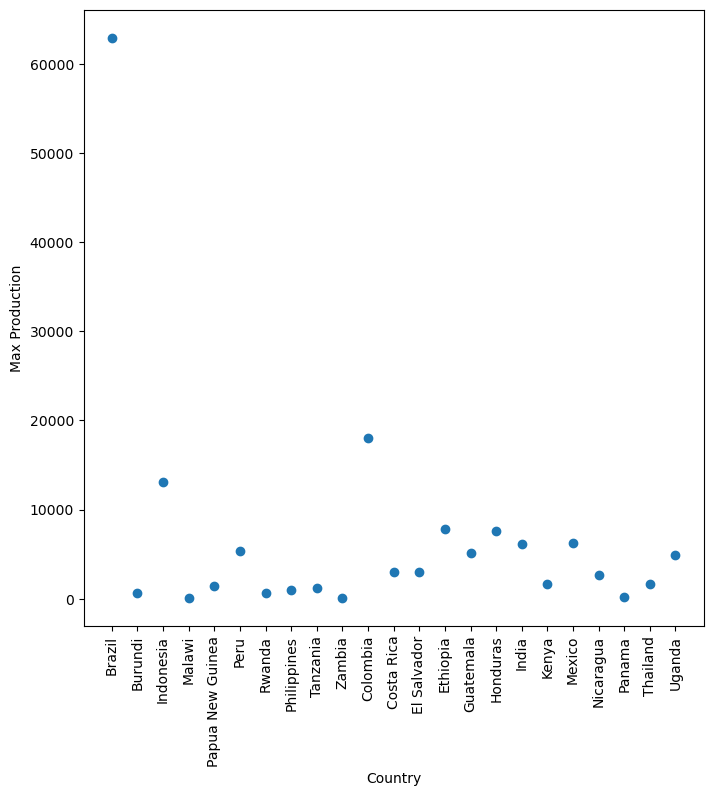

In [102]:

filtered_df = coffee_ultimate_df[(coffee_ultimate_df["Score"] >= 75) & (coffee_ultimate_df["Max Production"] >= 50)]


# Create the scatter plot
plt.figure(figsize=(8,8))

for i, country in enumerate(filtered_df['Country'].unique()):
    # Filter data for the current country
    temp_df = filtered_df[filtered_df['Country'] == country]
    plt.scatter(temp_df['Score'], temp_df['Max Production'], color=colors[i], label=country)


# Plotting
plt.scatter(filtered_df['Country'], filtered_df['Max Production'])
plt.xticks(rotation=90) 
plt.xlabel('Country')
plt.ylabel('Max Production')

# # Save the figure
# plt.savefig("output_data/Scatter Plot Amount Produced by Country.png")


plt.show()

## Drop Rows where Scores are nan

In [103]:
# Drop rows where 'Max Production' is NaN
coffee_ultimate_df.dropna(subset=['Score', 'AVG_Balance','AVG_Quakers'], inplace=True)

print(coffee_ultimate_df.head())

     Country  Max Production  AVG_Aroma  AVG_Flavor  AVG_Aftertaste  \
2     Brazil      62924.8836   7.553106    7.573561        7.440530   
3    Burundi        667.1990   7.415000    7.460000        7.250000   
4    Ecuador       2375.7660   7.583333    7.640000        7.553333   
5  Indonesia      13070.0386   7.649000    7.573000        7.415500   
7     Malawi        137.1610   7.567273    7.387273        7.257273   

   AVG_Acidity  AVG_Body  AVG_Balance  AVG_Uniformity  AVG_Clean.Cup  \
2     7.511439  7.544545     7.531515        9.884924       9.853485   
3     7.415000  7.290000     7.415000       10.000000      10.000000   
4     7.693333  6.026667     6.970000       10.000000      10.000000   
5     7.491000  7.631500     7.520000        9.933000       9.966500   
7     7.408182  7.338182     7.371818       10.000000      10.000000   

   AVG_Sweetness  AVG_Moisture  AVG_Quakers      Score   Latitude   Longitude  
2       9.949394      0.082348      0.44697  77.189394 -14.2

## Visualized Bar Chart of Quality Score with trend line of Amount Produced

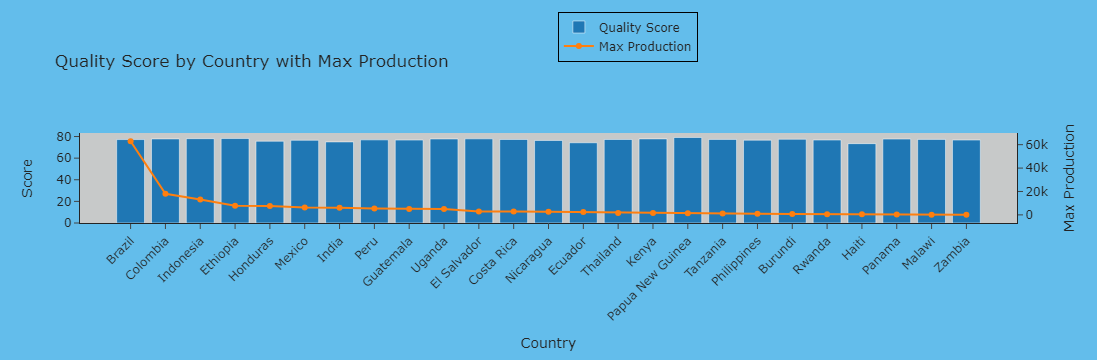

In [104]:
import plotly.graph_objects as go

# Create the bar chart   https://stackoverflow.com/questions/60204175/plotly-how-to-add-trendline-to-a-bar-chart
fig = go.Figure()

# Add bar chart for quality score   ---- https://plotly.com/python/line-charts/    https://plotly.com/python/bar-charts/
fig.add_trace(go.Bar(x=coffee_ultimate_df['Country'], y=coffee_ultimate_df['Score'], name='Quality Score'))

# Sort dataframe by Amount_Produced for trend line  
quality_quantity_df_sorted = coffee_ultimate_df.sort_values(by='Max Production')

# Add line plot for Amount_Produced trend  ----- https://plotly.com/python/creating-and-updating-figures/
#                                          -----  https://plotly.com/python/line-charts/
fig.add_trace(go.Scatter(x=quality_quantity_df_sorted['Country'], y=quality_quantity_df_sorted['Max Production'],
                         mode='lines+markers', name='Max Production', yaxis='y2'))
                       #   ---- https://community.plotly.com/t/lines-markers-mode-with-express/21707


# Customize the layout     ----https://stackoverflow.com/questions/61980632/update-layout-argument-list-with-plotly
#                          ----- https://stackoverflow.com/questions/72531577/plotly-how-to-manually-assign-bar-colors-to-categorical-lables-in-go-bar
fig.update_layout(
    template='simple_white',
    paper_bgcolor='#63bdeb',   #   --- https://matplotlib.org/2.2.5/api/_as_gen/matplotlib.pyplot.colors.html
    plot_bgcolor='#c7c9c9',      #   ----- #  ---  https://www.google.com/search?q=%23F9F9FA&oq=%23F9F9FA&gs_lcrp=EgZjaHJvbWUyCQgAEEUYORiABDIGCAEQABgeMgYIAhAAGB4yBggDEAAYHjIICAQQABgPGB4yBggFEAAYHjIKCAYQABgFGA8YHtIBCTEyMDZqMGoxNagCCLACAQ&sourceid=chrome&ie=UTF-8
    
    title='Quality Score by Country with Max Production',
    xaxis_title='Country',
    yaxis=dict(title='Score', autorange=True),
    xaxis=dict(categoryorder='total descending', tickangle=-45), # # https://plotly.com/python/categorical-axes/
    yaxis2=dict(title='Max Production', overlaying='y', side='right', autorange=True),
    legend=dict(x=0.51, y=2.35, bordercolor='Black', borderwidth=1)
)

# # Save the figure
# plt.savefig("output_data/Bar Chart of Quality Score with trend line of Amount Produced.jpg")


# Show the plot
fig.show()

## Flavor Rating by Country

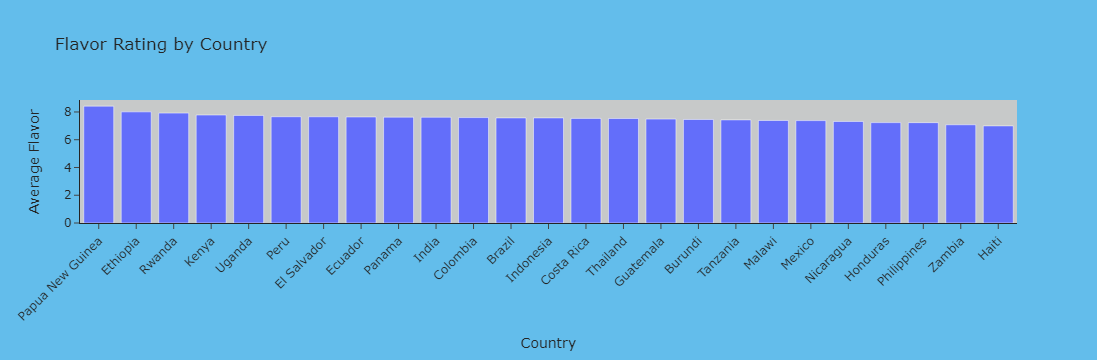

In [105]:

# Create the plot
fig = px.bar(
    coffee_ultimate_df,
    x='Country',
    y='AVG_Flavor',
    labels={'AVG_Flavor': 'Average Flavor'},
    title='Flavor Rating by Country'
)

# Customize the layout
fig.update_layout(
    template='simple_white',
    paper_bgcolor='#63bdeb',
    plot_bgcolor='#c7c9c9',
    xaxis_title='Country',
    yaxis_title='Average Flavor',
    xaxis=dict(categoryorder='total descending', tickangle=-45)  # Properly specify dictionary for x-axis config
)

# # Save the figure
# plt.savefig("output_data/Flavor Rating by Country.jpg")



# Show the plot
fig.show()

## Scatter Plot Amt Produced verse Score

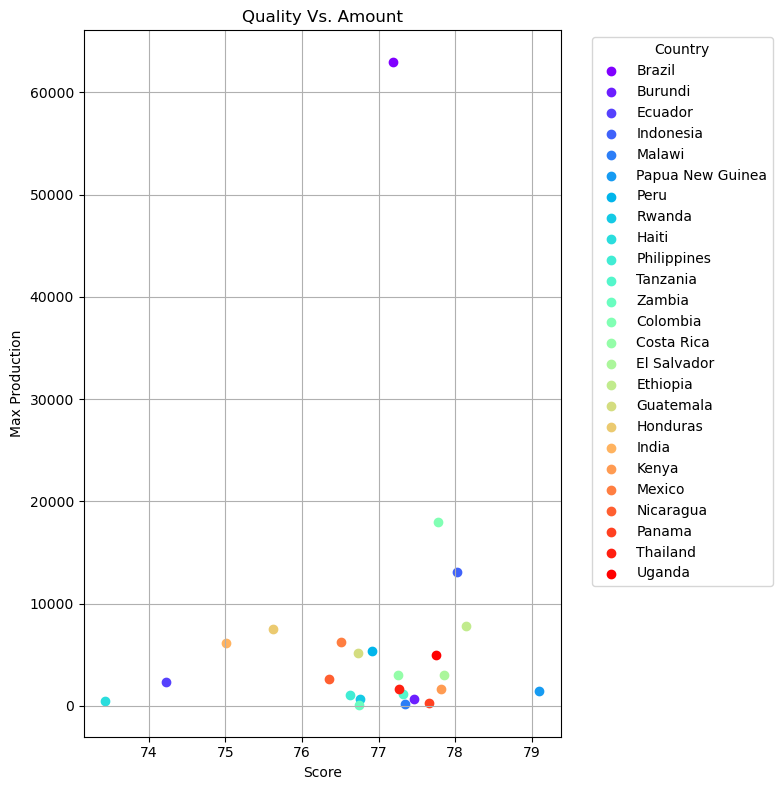

In [106]:

# # Create a unique color for each country
# colors = plt.cm.rainbow(np.linspace(0, 1, len(coffee_ultimate_df['Country'].unique())))

# Create the scatter plot
plt.figure(figsize=(8,8))

for i, country in enumerate(coffee_ultimate_df['Country'].unique()):
    # Filter data for the current country
    temp_df = coffee_ultimate_df[coffee_ultimate_df['Country'] == country]
    plt.scatter(temp_df['Score'], temp_df['Max Production'], color=colors[i], label=country)

plt.title("Quality Vs. Amount")
plt.xlabel("Score")
plt.ylabel("Max Production")
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# # Save the figure
# plt.savefig("output_data/Scatter Plot Amt Produced verse Score.png")



plt.show()


## Map of Amount Produced by Country

In [107]:
%%capture --no-display

flavor_map_plot_Countries = coffee_ultimate_df.hvplot.points(
    "Longitude",     #  from df columns 
    "Latitude",     #  from df columns 
    geo = True,
    tiles = "CartoLight",
    frame_width = 1050,
    frame_height = 700,
    size = "Max Production",
    scale = 0.55,
    color = "Country",
    hover_cols = ["AVG_Aroma", "AVG_Flavor", "AVG_Aftertaste", "AVG_Body", "AVG_Balance"]
)

# # Save the figure
# plt.savefig("output_data/Map of Amount Produced by Country.png")


flavor_map_plot_Countries

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Country,Max Production,AVG_Aroma,AVG_Flavor,AVG_Aftertaste,AVG_Body,AVG_Balance)

# Map of Country by Score

In [108]:
%%capture --no-display

# Configure the map using the scaled values
flavor_map_plot_Countries = coffee_ultimate_df.hvplot.points(
    "Longitude",     #  from df columns 
    "Latitude",      #  from df columns 
    geo = True,
    tiles = "CartoLight",
    frame_width = 950,
    frame_height = 700,
    size = "Score",  
    scale = 0.55,
    color = "Country",
    hover_cols = ["AVG_Aroma", "AVG_Flavor", "AVG_Aftertaste", "Score"]
)


flavor_map_plot_Countries

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Country,Score,AVG_Aroma,AVG_Flavor,AVG_Aftertaste)

## Consumption Section 

## Read in Consumption df

In [110]:
# READ -
coffee_intake_df = pd.read_csv("data/Coffee_domestic_consumption.csv")

coffee_intake_df.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


## get rid of columns to keep datframe smaller

In [111]:
columns_to_keep = ['Country', 'Coffee type', 'Total_domestic_consumption']
consume_clean_df = coffee_intake_df[columns_to_keep]
consume_clean_df

,Country,Coffee type,Total_domestic_consumption
0,Angola,Robusta/Arabica,46500000
1,Bolivia (Plurinational State of),Arabica,75180000
2,Brazil,Arabica/Robusta,27824700000
3,Burundi,Arabica/Robusta,3412020
4,Ecuador,Arabica/Robusta,381540000
5,Indonesia,Robusta/Arabica,4920480000
6,Madagascar,Robusta,588705960
7,Malawi,Arabica,2340000
8,Papua New Guinea,Arabica/Robusta,3608400
9,Paraguay,Arabica,35100000


## Merge Consumption df

In [112]:
# Merge 
coffee_consumer_df = pd.merge(coffee_ultimate_df, consume_clean_df, how="outer", on="Country")
print(coffee_consumer_df.head())

     Country  Max Production  AVG_Aroma  AVG_Flavor  AVG_Aftertaste  \
0     Brazil      62924.8836   7.553106    7.573561        7.440530   
1    Burundi        667.1990   7.415000    7.460000        7.250000   
2    Ecuador       2375.7660   7.583333    7.640000        7.553333   
3  Indonesia      13070.0386   7.649000    7.573000        7.415500   
4     Malawi        137.1610   7.567273    7.387273        7.257273   

   AVG_Acidity  AVG_Body  AVG_Balance  AVG_Uniformity  AVG_Clean.Cup  \
0     7.511439  7.544545     7.531515        9.884924       9.853485   
1     7.415000  7.290000     7.415000       10.000000      10.000000   
2     7.693333  6.026667     6.970000       10.000000      10.000000   
3     7.491000  7.631500     7.520000        9.933000       9.966500   
4     7.408182  7.338182     7.371818       10.000000      10.000000   

   AVG_Sweetness  AVG_Moisture  AVG_Quakers      Score   Latitude   Longitude  \
0       9.949394      0.082348      0.44697  77.189394 -14.

## get rid of countries with nan values for Longitude and Latitude

In [113]:

cleaned_df = coffee_consumer_df.dropna(subset=['Longitude', 'Latitude'])
cleaned_df

,Country,Max Production,AVG_Aroma,AVG_Flavor,AVG_Aftertaste,AVG_Acidity,AVG_Body,AVG_Balance,AVG_Uniformity,AVG_Clean.Cup,AVG_Sweetness,AVG_Moisture,AVG_Quakers,Score,Latitude,Longitude,Coffee type,Total_domestic_consumption
0,Brazil,62924.8836,7.553106,7.573561,7.440530,7.511439,7.544545,7.531515,9.884924,9.853485,9.949394,0.082348,0.446970,77.189394,-14.235004,-51.925280,Arabica/Robusta,27824700000
1,Burundi,667.1990,7.415000,7.460000,7.250000,7.415000,7.290000,7.415000,10.000000,10.000000,10.000000,0.060000,0.000000,77.465000,-3.373056,29.918886,Arabica/Robusta,3412020
2,Ecuador,2375.7660,7.583333,7.640000,7.553333,7.693333,6.026667,6.970000,10.000000,10.000000,8.723333,0.030000,0.000000,74.230000,-1.831239,-78.183406,Arabica/Robusta,381540000
3,Indonesia,13070.0386,7.649000,7.573000,7.415500,7.491000,7.631500,7.520000,9.933000,9.966500,9.966500,0.098500,0.050000,78.020000,-0.789275,113.921327,Robusta/Arabica,4920480000
4,Malawi,137.1610,7.567273,7.387273,7.257273,7.408182,7.338182,7.371818,10.000000,10.000000,10.000000,0.124545,0.000000,77.344545,-13.254308,34.301525,Arabica,2340000
5,Papua New Guinea,1413.8545,8.330000,8.420000,7.830000,8.330000,8.000000,8.250000,9.330000,9.330000,10.000000,0.120000,0.000000,79.100000,-6.314993,143.955550,Arabica/Robusta,3608400
6,Peru,5372.5296,7.693000,7.658000,7.541000,7.699000,7.802000,7.666000,9.533000,9.466000,9.866000,0.066000,0.100000,76.920000,-9.189967,-75.015152,Arabica,402000000
7,Rwanda,638.8750,7.830000,7.920000,7.750000,7.830000,7.750000,7.750000,9.330000,9.330000,9.330000,0.110000,0.000000,76.760000,-1.940278,29.873888,Arabica,2139960
8,Haiti,513.9450,7.153333,6.998333,7.111667,7.126667,7.276667,7.056667,9.776667,8.555000,9.111667,0.110000,0.000000,73.431667,18.971187,-72.285215,Arabica,600600000
9,Philippines,1018.4820,7.364000,7.232000,7.302000,7.266000,7.298000,7.400000,9.866000,10.000000,9.866000,0.074000,0.000000,76.622000,12.879721,121.774017,Robusta/Arabica,2807280000


## sort to top ten Consumption

In [114]:

top_ten_countries_df = cleaned_df.sort_values('Total_domestic_consumption', ascending=False).head(10)


print(top_ten_countries_df)

        Country  Max Production  AVG_Aroma  AVG_Flavor  AVG_Aftertaste  \
0        Brazil      62924.8836   7.553106    7.573561        7.440530   
3     Indonesia      13070.0386   7.649000    7.573000        7.415500   
15     Ethiopia       7776.2234   7.896364    8.009091        7.893864   
20       Mexico       6218.6765   7.457585    7.379025        7.228051   
9   Philippines       1018.4820   7.364000    7.232000        7.302000   
12     Colombia      17980.3970   7.653060    7.597104        7.524699   
18        India       6160.9436   7.697857    7.618571        7.566429   
23     Thailand       1692.2342   7.484063    7.528125        7.473438   
13   Costa Rica       2997.9740   7.671373    7.537255        7.534510   
8         Haiti        513.9450   7.153333    6.998333        7.111667   

    AVG_Acidity  AVG_Body  AVG_Balance  AVG_Uniformity  AVG_Clean.Cup  \
0      7.511439  7.544545     7.531515        9.884924       9.853485   
3      7.491000  7.631500     7.520000 

## scatter plot of consumption

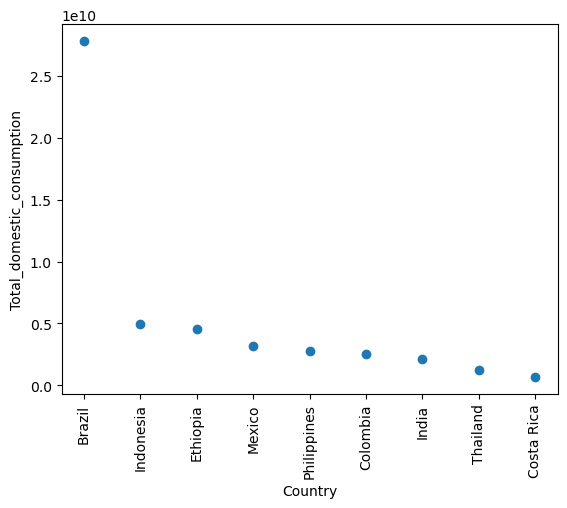

In [115]:

filtered2_df = top_ten_countries_df[(top_ten_countries_df["Score"] >= 75) & (top_ten_countries_df["Total_domestic_consumption"] >= 50)]

# Create a unique color for each country
colors = plt.cm.rainbow(np.linspace(0, 1, len(top_ten_countries_df['Country'].unique())))

plt.scatter(filtered2_df['Country'], filtered2_df['Total_domestic_consumption'])
plt.xticks(rotation=90)  
plt.xlabel('Country')
plt.ylabel('Total_domestic_consumption')

# # Save the figure
# plt.savefig("output_data/Scatter Plot Amount Produced by Country.png")


plt.show()

## Consumer bar chart

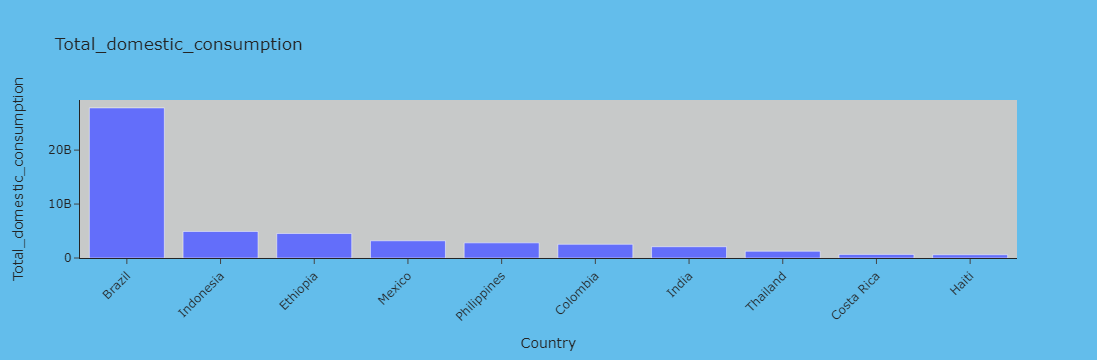

In [116]:


fig = px.bar(
    top_ten_countries_df,
    x='Country',
    y='Total_domestic_consumption',
    labels={'Country': 'Total_domestic_consumption'},
    title='Total_domestic_consumption'
)

fig.update_layout(
    template='simple_white',
    paper_bgcolor='#63bdeb',
    plot_bgcolor='#c7c9c9',
    xaxis_title='Country',
    yaxis_title='Total_domestic_consumption',
    xaxis=dict(categoryorder='total descending', tickangle=-45)  
)

# Show the plot
fig.show()

## findings prove that production and consumption go hand in hand. Brazil producing the most coffee and inturn consuming the most coffee. Score slightly varies Country to Country but not enough to prove impact which is why all of the heat map was similar in size. Score being quality that no matter where it is grown there is no direct link to quality from region to region or how much was produced the scores remained close Country to Country. 
